In [1]:
from preprocessing import prepare_subject_sample
from preprocessing import get_predicted_bold_response, get_predicted_neural_activity, plot_voxel_timecourse
from nilearn.plotting import plot_design_matrix

In [2]:
subject = "127630"
task = "LANGUAGE"
acq = "RL"
smoothing = 10
TR = 0.72 

In [3]:
data, glm, mask = prepare_subject_sample(
    subject=subject, 
    task=task, 
    acquisition=acq, 
    smoothing=smoothing, 
    voxel_quantile=98, 
    label_extraction=get_predicted_neural_activity,
)

processing subject gray matter mask /media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/anat/127630_gm_mask.nii.gz
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/anat/127630_gm_mask.nii.gz
concatenating volumes for task LANGUAGE
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/127630_LANGUAGE_RL_smooth-10mm_fMRIvols.nii.gz
files 127630_LANGUAGE_RL_smooth-10mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/127630_Regressor_tfMRI_LANGUAGE_RL.mat
/media/RCPNAS/Data2/CS-433-ML4S/data/events/127630_LANGUAGE_RL_event.csv
first GLM to select active voxel
computing f-map and selecting 98th voxel
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/127630_LANGUAGE_RL_smooth-10mm_fmap.nii.gz
(1939, 316)


In [4]:
bold, block, conv = data

In [5]:
import numpy as np
import random

def normalize(X):
    epsilon = 1e-8
    return (X - np.mean(X, axis=1, keepdims=True)) / (np.std(X, axis=1, keepdims=True) + epsilon)

In [6]:
bold_norm, block_norm, conv_norm = normalize(bold), normalize(block), normalize(conv)

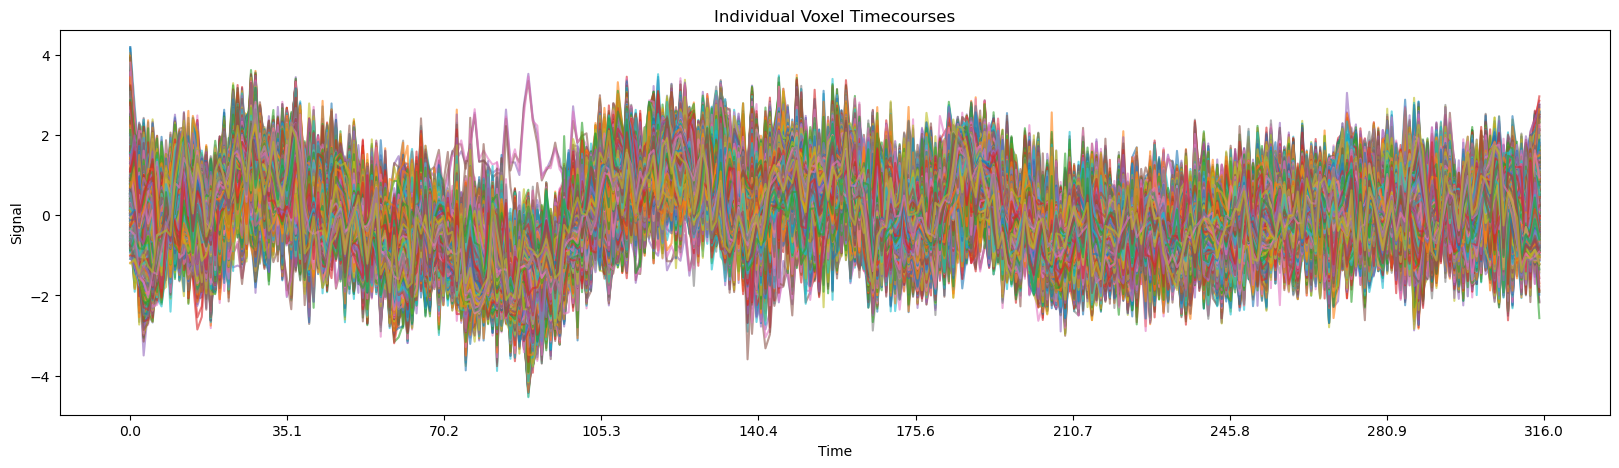

In [7]:
plot_voxel_timecourse(bold)

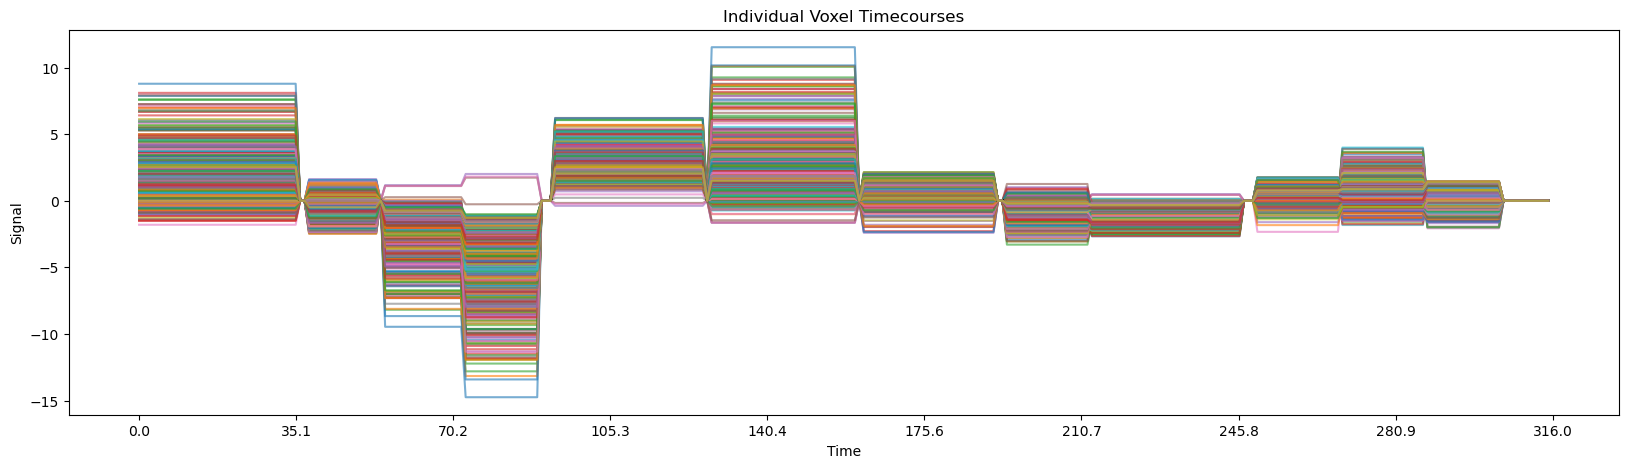

In [8]:
plot_voxel_timecourse(block)

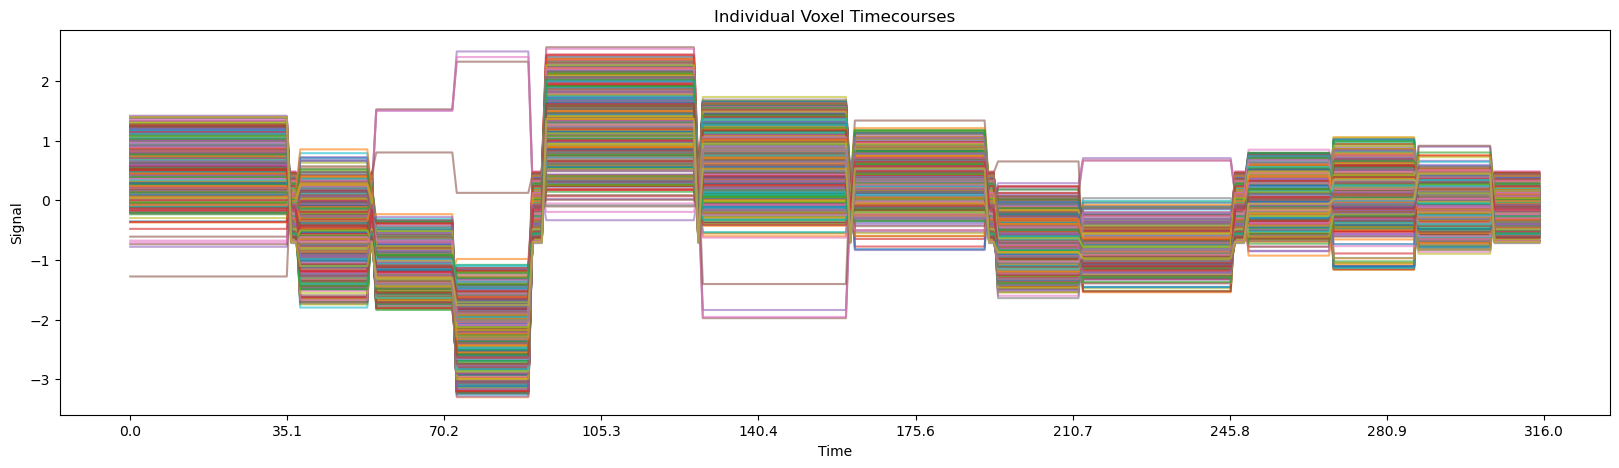

In [9]:
plot_voxel_timecourse(block_norm)

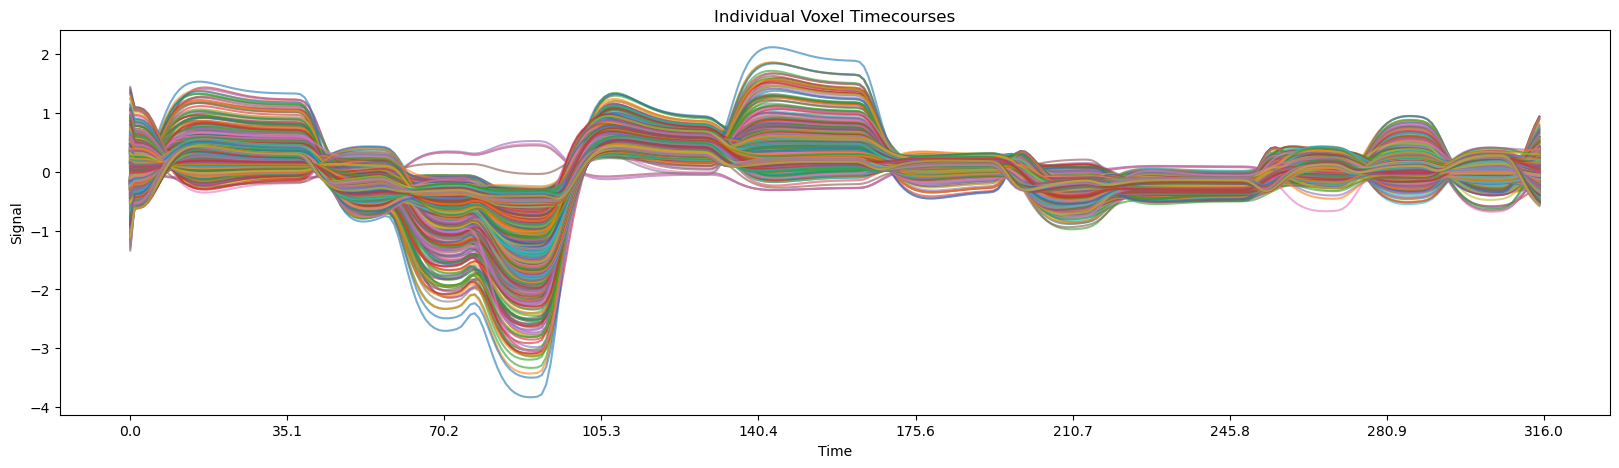

In [10]:
plot_voxel_timecourse(conv)

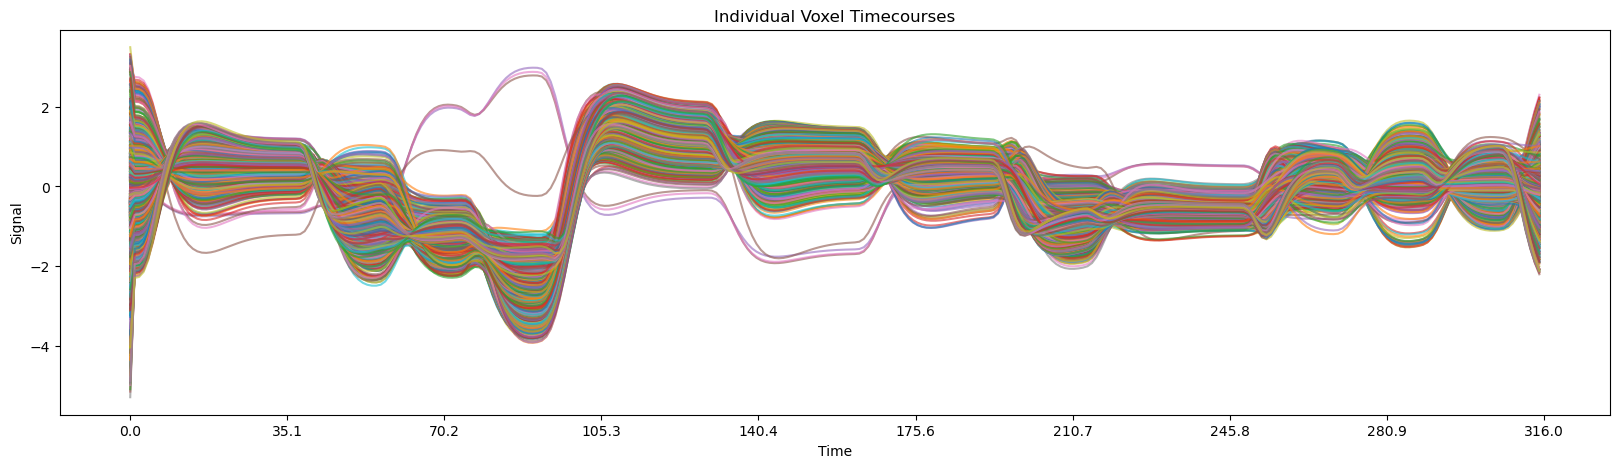

In [11]:
plot_voxel_timecourse(conv_norm)

In [8]:
from viz import plot_voxels

(1939, 316) (1939, 316) (1939, 316)


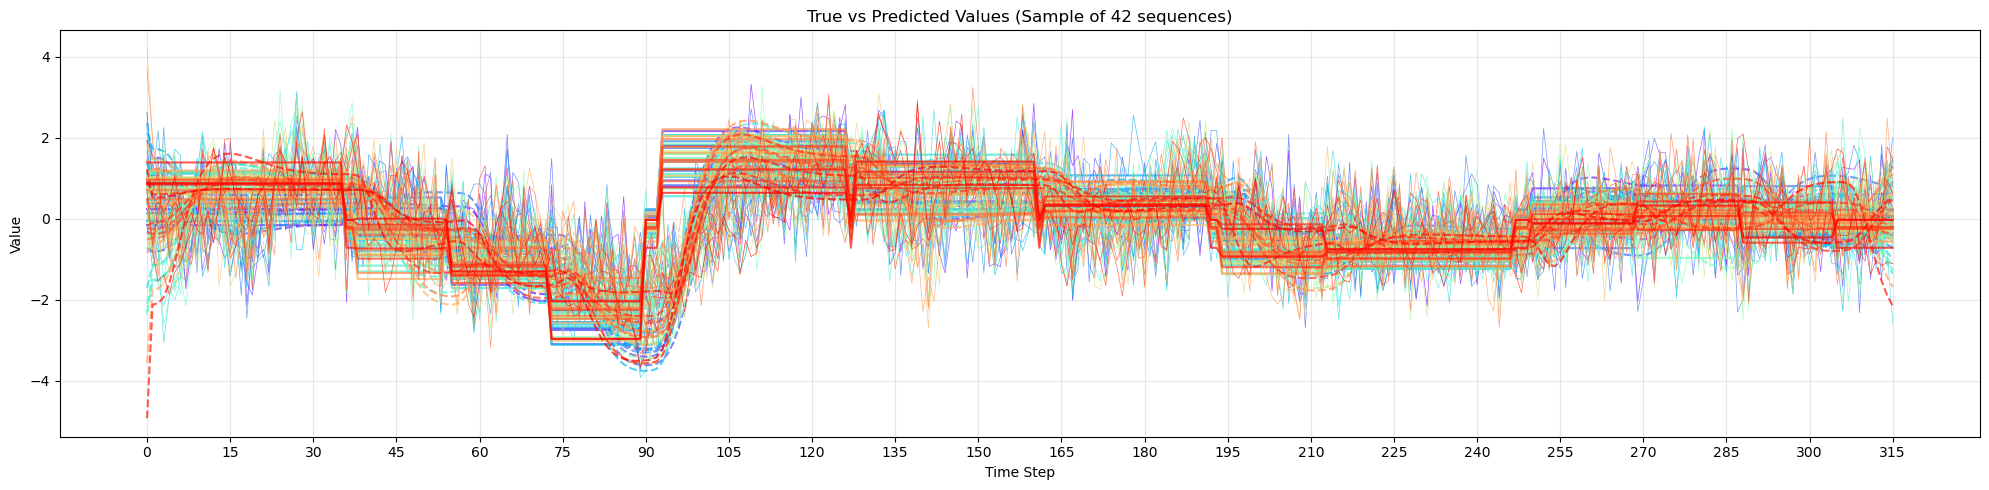

In [13]:
n_samples = 42

plot_voxels(bold_norm, block_norm, conv_norm, n_samples=n_samples, seed=54, print_x=True)

(1939, 316) (1939, 316) (1939, 316)


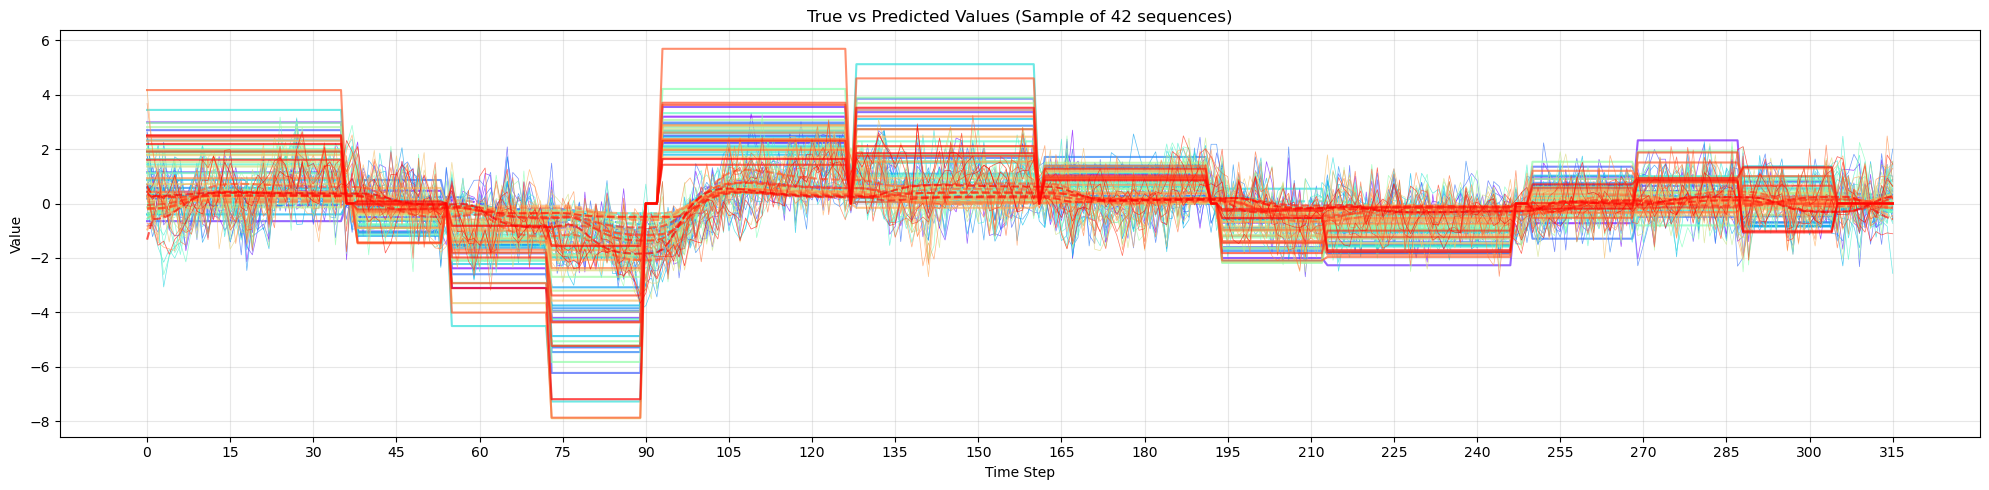

In [14]:
plot_voxels(bold_norm, block, conv, n_samples=n_samples, seed=54, print_x=True)

In [1]:
from preprocessing import merge_dataset
import xarray as xr

In [2]:
merged = merge_dataset([
    xr.load_dataset("/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/dataset_LANGUAGE_1_subjects_normed.nc"),
    xr.load_dataset("/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/dataset_EMOTION_1_subjects_normed.nc"),
    xr.load_dataset("/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/dataset_WM_1_subjects_normed.nc"),
    xr.load_dataset("/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/dataset_RELATIONAL_1_subjects_normed.nc"),
])

316 LANGUAGE
176 EMOTION
405 WM
232 RELATIONAL


In [6]:
merged.X.shape

(13573, 405)

(13573, 405) (13573, 405) (13573, 405)


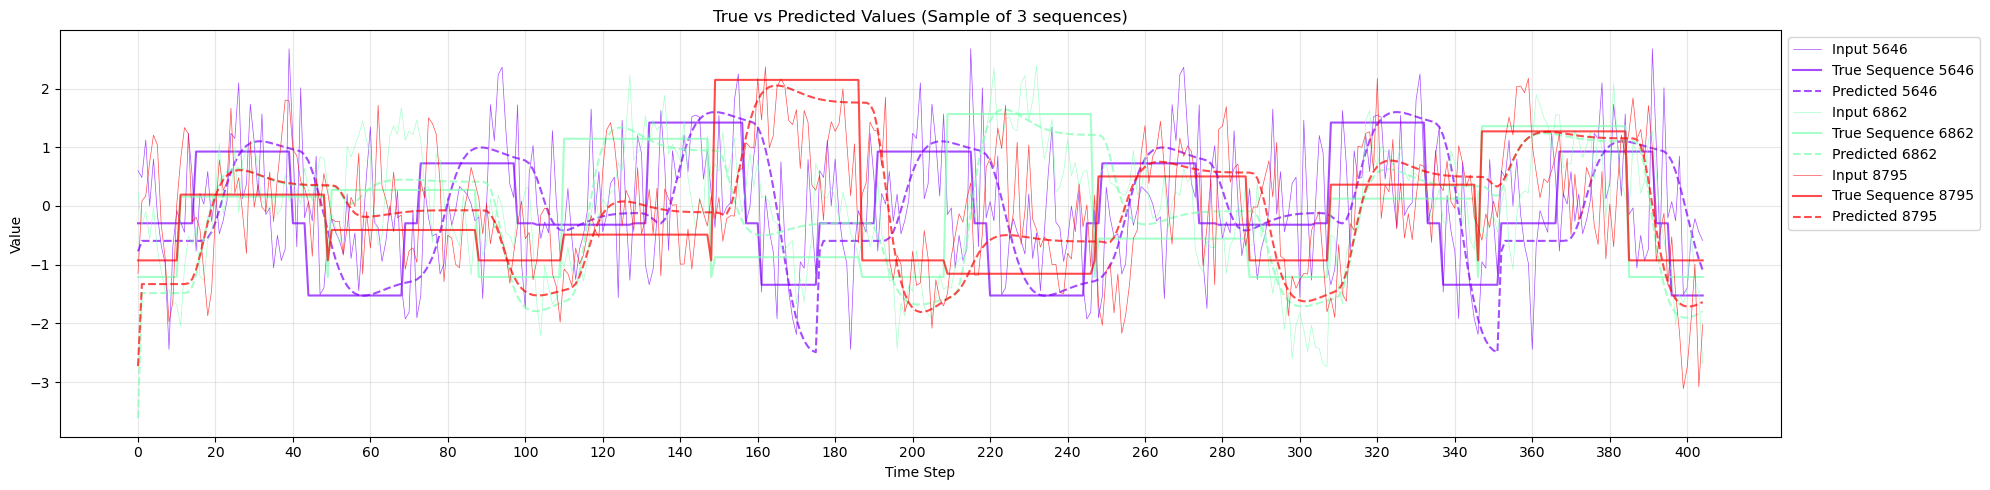

In [21]:
n_samples = 3

plot_voxels(merged.X, merged.Y, merged.Y_conv, n_samples=n_samples, seed=None, print_x=True)